In [1]:
import pytorch_lightning as pl
from models import *
from data.data_classes import *

In [2]:
# model = ThreeDConvAutoreg()
# model = model.load_from_checkpoint("./logs/ThreeDConv_RGB/experiment5/checkpoints/epoch=99-step=25000.ckpt")

In [3]:
batch_size = 4

num_ctx_frames=5
num_tgt_frames=5
split_ratio=[0.4, 0.1, 0.5]

moving_mnist = TwoColourMovingMNISTDataModule(batch_size,               
                                              num_ctx_frames, 
                                              num_tgt_frames,
                                              split_ratio=split_ratio)

moving_mnist.setup()
train_dl = moving_mnist.train_dataloader()
train_ctx_frames, train_tgt_frames = next(iter(train_dl))

val_dl = moving_mnist.val_dataloader()
val_ctx_frames, val_tgt_frames = next(iter(val_dl))                                              

In [4]:
save_filepath = "./plots/bounce_plot1"

### 3DConvNet models


In [5]:
# # Experiment 1 (skip MSE)
# model = ThreeDConv("skip")
# model = model.load_from_checkpoint("./logs/ThreeDConv_RGB/experiment1/checkpoints/epoch=99-step=25000.ckpt")
# # Experiment 2 (skip L1)
# model = ThreeDConv("skip")
# model = model.load_from_checkpoint("./logs/ThreeDConv_RGB/experiment2/checkpoints/epoch=99-step=25000.ckpt")

# # Experiment 5 (autoreg MSE)
# model = ThreeDConv("autoreg")
# model = model.load_from_checkpoint("./logs/ThreeDConv_RGB/experiment5/checkpoints/epoch=99-step=25000.ckpt")

### SimVP models

In [6]:
# hid_s=64
# hid_t=256
# N_s=4
# N_t=8
# kernel_sizes=[3,5,7,11]
# groups=4

# channels = 3
# height = 128
# width = 128
# input_shape = (channels, num_ctx_frames, height, width)

# # Experiment 1  (mse)
# model = SimVP(input_shape=input_shape, 
#               hid_s=hid_s, hid_t=hid_t, 
#               N_s=N_s, N_t=N_t,
#               kernel_sizes=kernel_sizes, 
#               groups=groups)
# model = model.load_from_checkpoint("./logs/SimVP/experiment1/checkpoints/epoch=99-step=25000.ckpt")

# # Experiment 2  (l1)
# model = SimVP(input_shape=input_shape, 
#               hid_s=hid_s, hid_t=hid_t, 
#               N_s=N_s, N_t=N_t,
#               kernel_sizes=kernel_sizes, 
#               groups=groups)
# model = model.load_from_checkpoint("./logs/SimVP/experiment2/checkpoints/epoch=99-step=25000.ckpt")

### PredRNN Models

In [7]:
# input_channels=3
# num_hidden=[64, 64, 64]
# kernel_size=5
# stride=1
# learning_rate=1e-3

# # Experiment 1 (mse)
# model = PredRNN(input_channels=input_channels,
#                 num_hidden=num_hidden,
#                 num_ctx_frames=num_ctx_frames,
#                 num_tgt_frames=num_tgt_frames,
#                 kernel_size=kernel_size,
#                 stride=stride)
# model = model.load_from_checkpoint("./logs/PredRNN_RGB/experiment1/checkpoints/epoch=99-step=25000.ckpt")

# # Experiment 2 (l1)
# model = PredRNN(input_channels=input_channels,
#                 num_hidden=num_hidden,
#                 num_ctx_frames=num_ctx_frames,
#                 num_tgt_frames=num_tgt_frames,
#                 kernel_size=kernel_size,
#                 stride=stride)
# model = model.load_from_checkpoint("./logs/PredRNN_RGB/experiment1/checkpoints/epoch=99-step=25000.ckpt")

### Predicted Frames Set 1

In [8]:
model = ThreeDConv("skip")
model = model.load_from_checkpoint("./logs/ThreeDConv_RGB/experiment1/checkpoints/epoch=99-step=25000.ckpt")
model.eval()

ThreeDConv(
  (mod): ThreeDConvWideFourDeepThreeSkipRGB(
    (mod1): Sequential(
      (0): Conv3dBlock(
        (mod): Sequential(
          (0): Conv3d(3, 32, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
          (1): BatchNorm3d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): LeakyReLU(negative_slope=0.2)
        )
      )
      (1): Conv3dBlock(
        (mod): Sequential(
          (0): Conv3d(32, 32, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
          (1): BatchNorm3d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): LeakyReLU(negative_slope=0.2)
        )
      )
      (2): Conv3dBlock(
        (mod): Sequential(
          (0): Conv3d(32, 32, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
          (1): BatchNorm3d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): LeakyReLU(negative_slope=0.2)
        )
      )
      (3): Conv3dBlock(

In [9]:
model1_pred_frames = model(val_ctx_frames)
model1_pred_frames.shape

torch.Size([4, 3, 5, 128, 128])

### Predicted Frames Set 2

In [10]:
model = ThreeDConv("skip")
model = model.load_from_checkpoint("./logs/ThreeDConv_RGB/experiment2/checkpoints/epoch=99-step=25000.ckpt")
model.eval()

ThreeDConv(
  (mod): ThreeDConvWideFourDeepThreeSkipRGB(
    (mod1): Sequential(
      (0): Conv3dBlock(
        (mod): Sequential(
          (0): Conv3d(3, 32, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
          (1): BatchNorm3d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): LeakyReLU(negative_slope=0.2)
        )
      )
      (1): Conv3dBlock(
        (mod): Sequential(
          (0): Conv3d(32, 32, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
          (1): BatchNorm3d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): LeakyReLU(negative_slope=0.2)
        )
      )
      (2): Conv3dBlock(
        (mod): Sequential(
          (0): Conv3d(32, 32, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
          (1): BatchNorm3d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): LeakyReLU(negative_slope=0.2)
        )
      )
      (3): Conv3dBlock(

In [11]:
model2_pred_frames = model(val_ctx_frames)
model2_pred_frames.shape

torch.Size([4, 3, 5, 128, 128])

### Predicted Frames Set 3

In [14]:
model = ThreeDConvAutoreg()
model = model.load_from_checkpoint("./logs/ThreeDConv_RGB/experiment5/checkpoints/epoch=99-step=25000.ckpt")
model.eval()

ThreeDConvAutoreg(
  (mod): ThreeDConvWideFourDeepThreeSkipAutoregRGB(
    (mod1): Sequential(
      (0): Conv3dBlock(
        (mod): Sequential(
          (0): Conv3d(3, 32, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
          (1): BatchNorm3d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): LeakyReLU(negative_slope=0.2)
        )
      )
      (1): Conv3dBlock(
        (mod): Sequential(
          (0): Conv3d(32, 32, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
          (1): BatchNorm3d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): LeakyReLU(negative_slope=0.2)
        )
      )
      (2): Conv3dBlock(
        (mod): Sequential(
          (0): Conv3d(32, 32, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
          (1): BatchNorm3d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): LeakyReLU(negative_slope=0.2)
        )
      )
      (3)

In [15]:
model3_pred_frames = model(val_ctx_frames)
model3_pred_frames.shape

torch.Size([4, 3, 5, 128, 128])

### Plotting

In [27]:
def make_thesis_plot(frame_sets, names, plot_width, plot_height):

    def show_frames(frames, ax, start_id, row_label=None):
        for i, frame in enumerate(frames):
            ax[i].imshow(frame)
            ax[i].set_xticks([])
            ax[i].set_yticks([])
            ax[i].set_xlabel(f"t={start_id+i}")
            ax[i].xaxis.set_label_coords(.52, 1.15)

        if row_label is not None:
            ax[0].set_ylabel(row_label, wrap=True)

    fig, ax = plt.subplots(len(frame_sets), 5,
                               figsize = (plot_width, plot_height))

    for i, frames in enumerate(frame_sets):
        frames = frames.squeeze().permute(1, 2, 3, 0).cpu().detach().numpy()
        show_frames(frames, ax[i], 5, names[i])
    fig.set_facecolor("white")
    plt.savefig(save_filepath)
    return fig

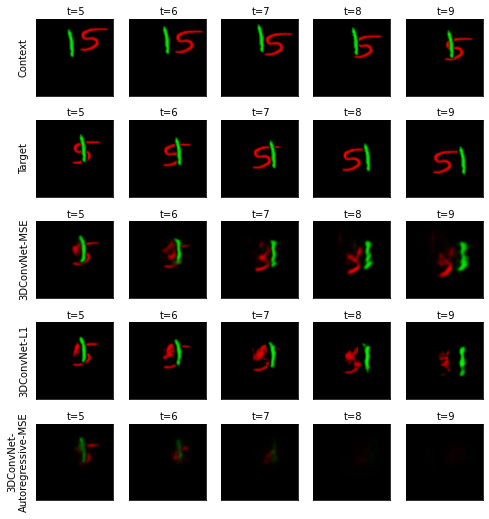

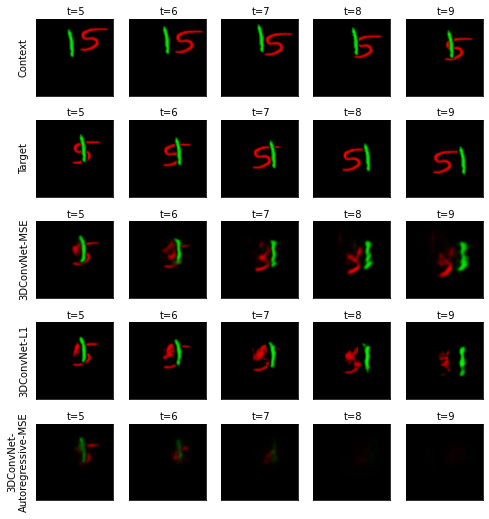

In [28]:
index = 0
plot_width = 8
plot_height = 9
frame_sets = [val_ctx_frames[index],
              val_tgt_frames[index],
              model1_pred_frames[index],
              model2_pred_frames[index],
              model3_pred_frames[index],]

names = ["Context", "Target", 
         "3DConvNet-MSE", "3DConvNet-L1",
         "3DConvNet-\nAutoregressive-MSE"]               
make_thesis_plot(frame_sets, names, plot_width, plot_height)